In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = './household_power_consumption.txt'  # Replace with your path

data = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
data.dropna(inplace=True)
data['Global_active_power'] = data['Global_active_power'].astype(float)
data.set_index('datetime', inplace=True)

# Resample data to daily averages
daily_data = data.resample('D').mean()
daily_data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data[['Global_active_power']])


C:\Users\schatterjee\AppData\Local\Temp\ipykernel_20056\2090514173.py:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
C:\Users\schatterjee\AppData\Local\Temp\ipykernel_20056\2090514173.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
C:\Users\schatterjee\AppData\Local\Temp\ipykernel_20056\2090514173.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:

In [10]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Number of past days to use for prediction
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


c:\Python3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - loss: 0.0449 - val_loss: 0.0063
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0110 - val_loss: 0.0061
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0111 - val_loss: 0.0060
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0106 - val_loss: 0.0060
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0111 - val_loss: 0.0063
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0103 - val_loss: 0.0061
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0093 - val_loss: 0.0061
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0095 - val_loss: 0.0060
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0101 - val_loss: 0.0060
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0103 - val_loss: 0.0060
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0096 - val_loss: 0.0059
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step


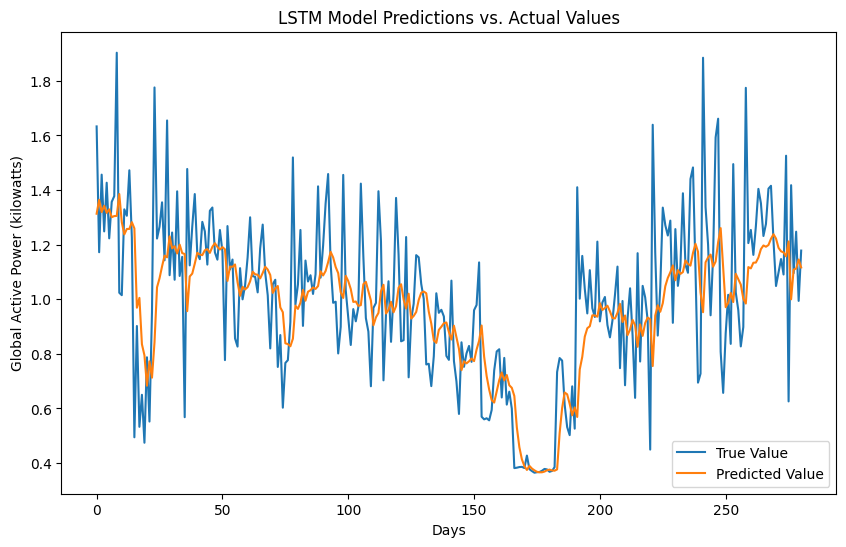

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_actual = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Days')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()


In [13]:
# Check for NaN values in y_test and y_pred
print(f"Number of NaN in y_test: {np.isnan(y_test).sum()}")
print(f"Number of NaN in y_pred: {np.isnan(y_pred).sum()}")
# Reshape y_test and y_pred to ensure correct shape before inverse transforming
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Inverse transform
y_actual = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)
# Replace NaN values with 0 (or you can use other strategies)
y_test = np.nan_to_num(y_test)
y_pred = np.nan_to_num(y_pred)


Number of NaN in y_test: 0
Number of NaN in y_pred: 0


In [14]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 2.293597726655533


# Exercise 

- Use a different optimizer.
- Train for more epochs.

In [15]:
# Compile the model using rmsprop optimizer
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.summary()

# Train the model for 100 epoch
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0101 - val_loss: 0.0069
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0097 - val_loss: 0.0064
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0089 - val_loss: 0.0074
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0093 - val_loss: 0.0063
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0091 - val_loss: 0.0056
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0089 - val_loss: 0.0056
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085 - val_loss: 0.0069
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0089 - val_loss: 0.0056
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/ste

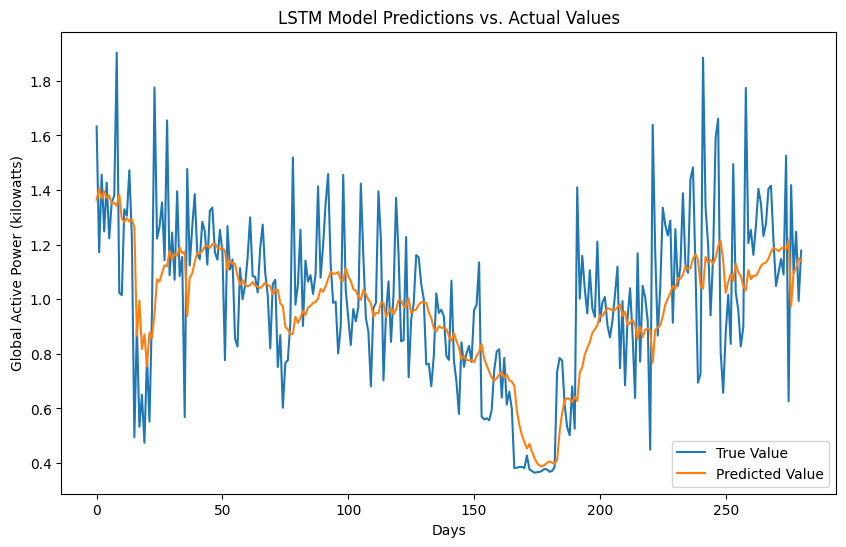

Root Mean Squared Error: 0.23741741217007203


In [16]:
# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Days')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f'Root Mean Squared Error: {rmse}')